In [167]:
import numpy as np
import pdb
import math
import matplotlib.pyplot as plt
%matplotlib inline

## 1) Floating Point Representation

In [168]:
# 1. Floating Point Representation:
# a

def one_a():
    eps = 1
    while True:
        lhs = 1-eps
        rhs = 1.0
        if lhs == rhs:
            eps = eps * 2
            return eps
            break
        elif lhs != rhs:
            eps = eps / 2
            continue

#b
def one_b():
    eps = 1
    while True:
        lhs = 1+eps
        rhs = 1.0
        if lhs == rhs:
            eps = eps * 2
            return eps
            break
        elif lhs != rhs:
            eps = eps / 2
            continue

#c
def one_c():
    fraction = 0
    for i in range(52): # 52 bits held in mantissa
        d = 2 ** i
        fraction += d

    mantissa = float(str(1.)+ str(fraction)) # add the implied 1.
    eps = 0
    while True:
        try:
            max_float = (2 ** (eps)) * mantissa
            eps += 1
        except OverflowError:
            return max_float
            break
#d 
def one_d():
    fraction = 0
    mantissa = float(str(1.)+ str(fraction)) # add the implied 1.
    eps = 0
    while True:
        min_float = (2 ** (eps)) * mantissa
        eps -= 1
        if min_float / 2 == 0:
            return min_float
            break

print ('1a:', one_a())
print ('1b:', one_b())
print ('1c:', one_c())
print ('1d:', one_d())


1a: 1.1102230246251565e-16
1b: 2.220446049250313e-16
1c: 9.393270180926201e+307
1d: 5e-324


The above values are calculated to adhere to IEEE 754. According to IEEE 754, $\epsilon$ is an 11 bit number (float64), however the largest of which contains 10 "1's", since the full 11 "1's" have different meanings (infinity). That means that by multiplying/dividing epsilon by 2, we will eventually reach the desired conditions for 1a) and 1b) respectively. 

As for 1c) and 1d), the mantissa had to be maximized and minimized respectively. The minimized mantissa = 1, since there would be 52 "0's" added to the implied 1, which was used in solving for the smallest representable positive number. The maximized mantissa would be 1. + 52 "1's", and used in order to represent the largest representable number. The rest was just finding $\epsilon$ such that there was an OverflowError for maximum, or an equality to 0 for minimum. 

## 2) Roundoff Error

Since the $\lim_{x\to0} \frac{1-cos(x)}{x^2} = \frac{0}{0} $, we must L'Hopital's rule to analytically evalulate the limit.

To use L'Hopital's rule, we evaluate the derivatives of the numerator $ f(x) = 1-cos(x) $ and the denomenator $ g(x) = x^2 $, giving: 

$$ f'(x) = sin(x) $$ 
$$ g'(x) = 2x $$

And the $\lim_{x\to0}\frac{sin(x)}{2x} = \frac{0}{0}$ so we must use L'Hopital's Rule again:

$$ f''(x) = cos(x) $$
$$ g''(x) = 2 $$ 

Now, the $\lim_{x\to0}\frac{cos(x)}{2} = \frac{1}{2}$

Below is the numerical result:


In [169]:
# 2 Round Off Error

def round_off_exp(x):
    fctn = (1-np.cos(x))/(x**2)
    return fctn

N = 1e6 # number of terms in range [lower,upper)
lower = 1e-8 # lower bound
upper = 1e-6 # upper bound
x = np.linspace(lower,upper,N) # range of numbers surrounding 10^(-7)
y = round_off_exp(x)
lim = np.mean(y) # an approximation of the limit. 
print ('Numerical Limit @ 10^-7: ',lim)
print (np.finfo(float))
print ('Numerical Limit @ 10^-16: ', np.mean(round_off_exp(np.linspace(1e-15,1e-17,1e6))))

Numerical Limit @ 10^-7:  0.500497449168
Machine parameters for float64
---------------------------------------------------------------
precision= 15   resolution= 1.0000000000000001e-15
machep=   -52   eps=        2.2204460492503131e-16
negep =   -53   epsneg=     1.1102230246251565e-16
minexp= -1022   tiny=       2.2250738585072014e-308
maxexp=  1024   max=        1.7976931348623157e+308
nexp  =    11   min=        -max
---------------------------------------------------------------

Numerical Limit @ 10^-16:  0.0


The discrepancy between these two values has to do with the way we analytically solve the $\lim_{x\to0}$ and how the computer numerically solves the same limit. Using L'Hopital's rule to analytically solves the limit implies using an infitesimally small value around 0 and solving through taking subsequent derivatives. The computer however, does not have the capabilities of using infitesimally small values, it has to use an actual number. Here, we have used $N = 10^{6}$ values from $10^{-8}$ to $10^{-6}$ and found the mean to approximate a value for $10^{-7}$ These necessary approximations are responsible for the roundoff error we see as a discrepancy between the analytic and numerical values

I have also printed the float info for the float64 data type provided by numpy. It has a precision of $10^{-15}$, since there are only 15 bits available for the exponent in the floating point representation. So if we were to approximate $\lim_{x\to0}$ using any number less than $10^{-15}$ (like $10^{-16}$, done above in the third print statement), we are unable to resolve our answer, and get 0, printed last.

## 3) Interpolation

In [170]:
# 3 Interpolation
data = np.loadtxt('hw1.dat')
x_data = data[:,0]
y_data = data[:,1]

# linear interplation
def lin_inter(x): # x is some arbitrary point
    for idx,val in enumerate(x_data):
        if x < x_data[idx] and x > x_data[idx-1]:
            x_upper = x_data[idx]
            x_lower = x_data[idx-1]
            y_upper = y_data[idx]
            y_lower = y_data[idx-1]
            
            m = (y_upper - y_lower)/(x_upper - x_lower)
            y = m * (x-x_lower) + y_lower
            return y

print('1st Order: ',lin_inter(0.75))



1st Order:  0.088196285


In [171]:
def lang_term(x,xl,yl,xu,yu):
    '''
    args:
    -----
    x = term of interpolation
    xl = x of lower bound
    xu = x of upper bound
    yl = y of lower bound
    yu = y of upper bound
    
    output:
    -------
    P = polynomial evaluated at x, degree depending on prior polynomials (yl and yu)
    '''
    P = ((x - xu)*yl - (x-xl)*yu)/(xl-xu)
    return P


data = np.loadtxt('hw1.dat')
x_data = data[:,0]
y_data = data[:,1]

def nev_alg(x,x_data,y_data):
    y_0 = np.copy(y_data)
    order = 1 # order = 1 is the starting order, 
    while order <= len(x_data): 
        for i in range(len(x_data)):
            if i+1 >= len(y_0):
                #pdb.set_trace()
                order += 1 
                y_0 = y_0[:-1]
                break

            x_lower = x_data[i]
            y_lower = y_0[i]
            x_upper = x_data[i+order]
            y_upper = y_0[i+1]
            y = lang_term(x,x_lower,y_lower,x_upper,y_upper)
            y_0[i] = y
            if len(y_0) == 2:
                y_0 = y_0[:-1]
                ans = y_0[0]
                return ans
                break
            

print ('4th Order: ',nev_alg(0.75,x_data,y_data))

4th Order:  -0.356826099688


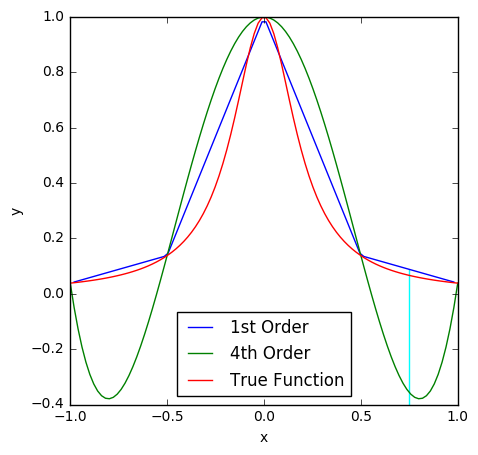

In [177]:
# plots figure using function defined above.

fig,ax = plt.subplots(1,1)
fig.set_size_inches(5,5)

x = np.linspace(-1,1,100)

y_tru = 1/(1+25*x**2)
y_lin = np.array([])
y_4 = np.array([])

for i in x:
    y_nev = nev_alg(i,x_data,y_data)
    y_4 = np.append(y_4,y_nev)
    y_l = lin_inter(i)
    y_lin = np.append(y_lin,y_l)

ax.plot(x,y_lin, label = '1st Order')
ax.plot(x,y_4, label='4th Order')
ax.plot(x,y_tru, label = 'True Function')
ax.vlines(0.75,-0.4,0.088, color = 'cyan')

ax.legend(loc=0)
ax.set_ylabel('y')
ax.set_xlabel('x')

3d) Above I have displayed the (1st Order) linear interpolation in blue, the 4th order polynomial interpolation from Neville's Algorithm in green, and the true function in red. This figure accurately displays how even though a higher order approximation takes in more terms, it can produce a less accurate approximation of the true function than a lower order approximation. In this case, I have placed a vertical line at x = 0.75 to further display this difference in accuracy.